In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve




## 1. **Problem Definition** 
Create a model for predicting mortality caused by Heart Failure. After the model is built and the project objective is achived(see Evaluation), outline the most important features that causes the mortality.  
## 2. **Data**
The dataset is from the Kaggle datasets which can be found here: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

The dataset is the part of the research project. The whole paper can be found here:
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5(2020 ,Davide Chicco & Giuseppe Jurman) 
## 3. **Evaluation** 
For evaluation I will use the recall metric and accuracy. The aim is to achiieve high procentage in both o f this metrics
## 4. **Features**
 - Age - Age of the patient
 - Anaemia - Decrease of red blood cells or hemoglobin (boolean)
 - Creatinine_Phosphokinase - Level of the CPK enzyme in the blood (mcg/L)
 - Diabetes - If the patient has diabetes (boolean)
 - Ejection_Fraction - Percentage of blood leaving the heart at each contraction (percentage)
 - High_Blood_Pressure - If the patient has hypertension (boolean)
 - Platelets - Platelets in the blood (kiloplatelets/mL)
 - Serum_Creatinine - Level of serum creatinine in the blood (mg/dL)
 - Serum_Sodium - Level of serum sodium in the blood (mEq/L)
 - Sex - Female or Male 
 - Smoking - If the patient smokes or not (boolean)
 - Time - Follow-up period (days)
 - DEATH_EVENT - True or False 
## 5. **Modelling** 
Build the ML models and hyperparameters tunining to ahieve the best possible results


#### First lets Explore the data 

In [3]:
# importing the data 
df = pd.read_csv("Data/heart_failure_clinical_records_dataset.csv")

In [4]:
# Creating temp dataframe
df_tmp = df.copy()

In [5]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df_tmp.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df_tmp.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


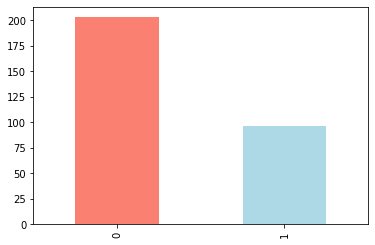

In [8]:
df["DEATH_EVENT"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

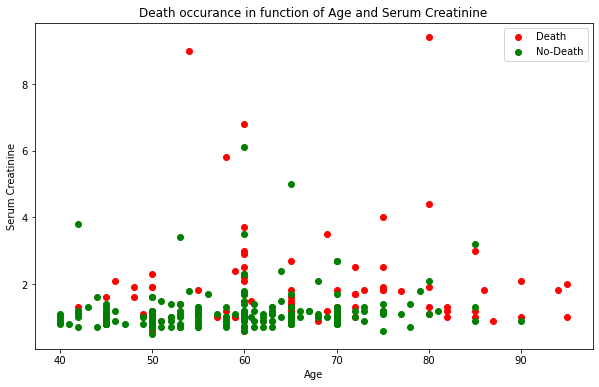

In [9]:
# Creating another figure 
plt.figure(figsize=(10,6))

# Scatter with positive example 
plt.scatter(df_tmp.age[df_tmp.DEATH_EVENT==1],
            df_tmp.serum_creatinine[df_tmp.DEATH_EVENT==1],
            c="red")

# Scatter with negative examples 
plt.scatter(df_tmp.age[df_tmp.DEATH_EVENT==0],
            df_tmp.serum_creatinine[df_tmp.DEATH_EVENT == 0],
          c = "green");
# Info
plt.title("Death occurance in function of Age and Serum Creatinine")
plt.xlabel("Age")
plt.ylabel("Serum Creatinine")
plt.legend(["Death","No-Death"]);

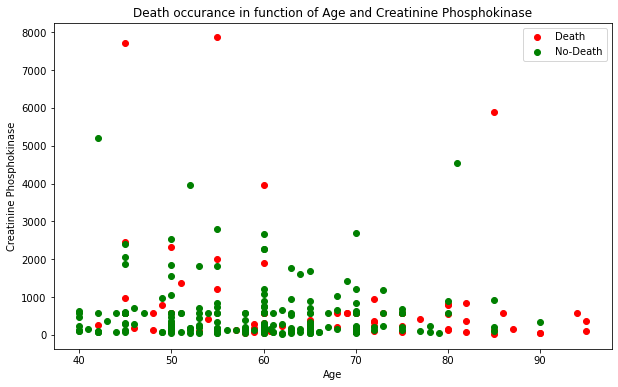

In [10]:
# Creating another figure 
plt.figure(figsize=(10,6))

# Scatter with positive example 
plt.scatter(df_tmp.age[df_tmp.DEATH_EVENT==1],
            df_tmp.creatinine_phosphokinase[df_tmp.DEATH_EVENT==1],
            c="red")

# Scatter with negative examples 
plt.scatter(df_tmp.age[df_tmp.DEATH_EVENT==0],
            df_tmp.creatinine_phosphokinase[df_tmp.DEATH_EVENT == 0],
          c = "green");

# Info
plt.title("Death occurance in function of Age and Creatinine Phosphokinase")
plt.xlabel("Age")
plt.ylabel("Creatinine Phosphokinase")
plt.legend(["Death","No-Death"]);

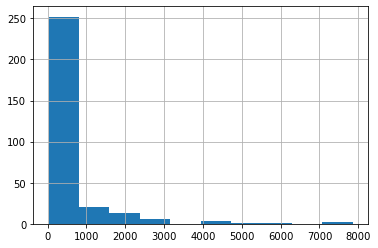

In [11]:
# LEts plot the histogram to see the distribution of the creatine phosphokonase
df_tmp["creatinine_phosphokinase"].hist();

<AxesSubplot:>

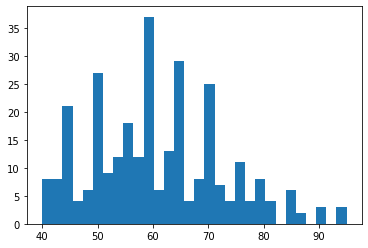

In [12]:
# Visualizing the age dsitribution by using the hstogram 
df_tmp["age"].hist(bins=30,xlabelsize= 10, grid = False)

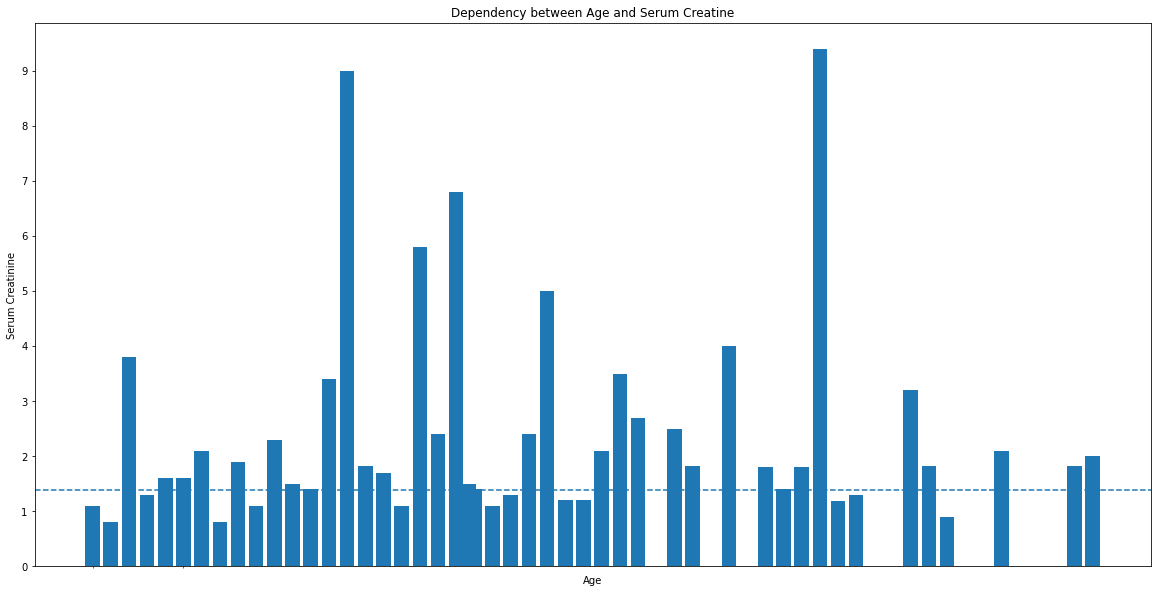

In [13]:


# Setup plot
fig, ax = plt.subplots(figsize=(20,10)) # (width,height)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 10, 1)
minor_ticks = np.arange(0, 50, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
# Plot the data
ax.bar(df_tmp["age"],df_tmp["serum_creatinine"])
ax.set(title="Dependency between Age and Serum Creatine", xlabel ="Age", ylabel = "Serum Creatinine")
# Add horizontal linethat shows the mean of serum creatine 
ax.axhline(df_tmp["serum_creatinine"].mean(), linestyle="--");

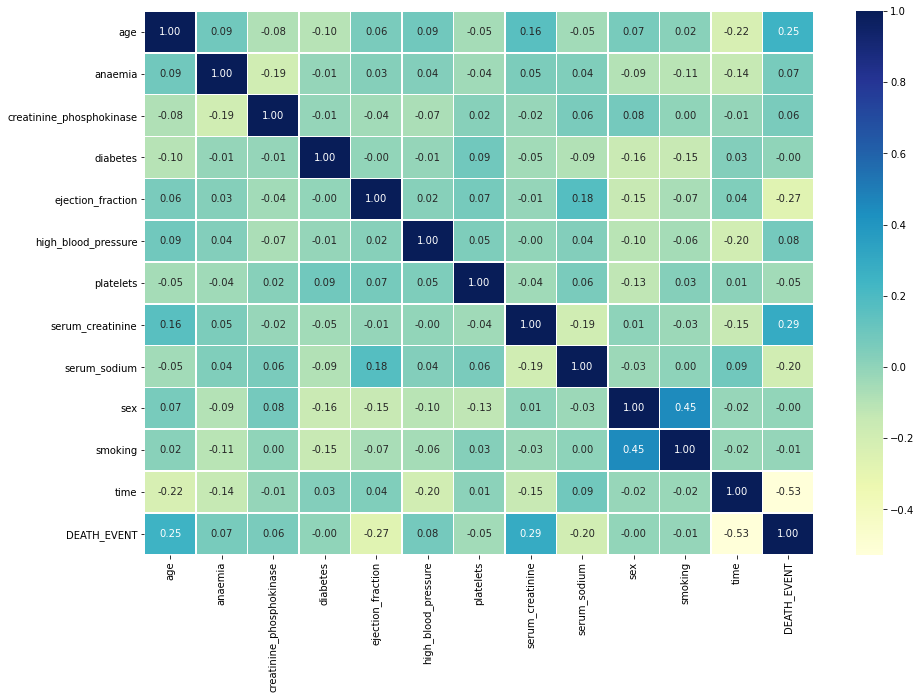

In [14]:
# Lets make corrolation matrix and visuallize it with heat map
corr_matrix = df_tmp.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths = 0.5,
                fmt=".2f",
                cmap="YlGnBu")

Based on this data set we see that there is a little correlation between death_event and serum creatine and also death event and age. We can see that there is no strong correalation between any of the features, but lets see how the machine learning models will handle this problem.

## Building ML models

In [15]:
# Lets create a dictionary with all the models we want to test

models = { "RandomForestClassifier": RandomForestClassifier(),
         "Logistic Regression": LogisticRegression(),
         "K-NeighborsClassifer": KNeighborsClassifier()}

# Create the function to keep models's scores

def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given ML models based on accuraccy
    models: a dic of different SciKitLearn ml models
    X_train : training labels (no labels)
    X_test : testing data(no labels)
    y_train : training labels 
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores



In [16]:
# Split data into X and y
X = df.drop("DEATH_EVENT", axis = 1)
y = df["DEATH_EVENT"]
# Create training and test data sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
model_scores = fit_and_score(models=models,
                            X_train = X_train,
                            X_test=X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

{'RandomForestClassifier': 0.8,
 'Logistic Regression': 0.8333333333333334,
 'K-NeighborsClassifer': 0.5333333333333333}

<AxesSubplot:>

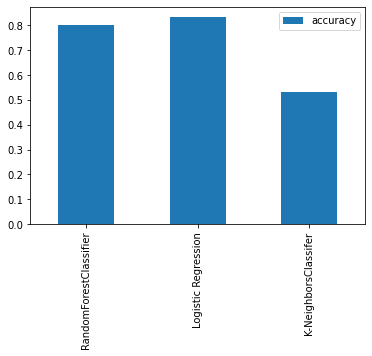

In [18]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()

## Tuning the models wit RandomizedSearchCV
Models Im going to tune are:
  * LogisticRegression 
  * RandomForestClassifier
as they achieved the highest scores

In [19]:
# Lets create the hyper parameter grid for logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"],
               "max_iter": [50,100,150]}
# Lets create hyperparameter grid for Random Forest Classifier
rf_grid = { "n_estimators": np.arange(10,1000,50),
            "max_depth": [None,3,5,10,12],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2)
          }
# Run Logistic Regression 

# Creates the random seed which enables the repetition of the experiment on the different machine(the result will be the same)
np.random.seed(42)

# Setup random hyperparamters search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter = 100,
                               verbose = True)
# Fit random hyperparamter search model for LogisticRegression 
rs_log_reg.fit(X_train,y_train)

D:\Development\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [50, 100, 150],
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
# Set up random seed
np.random.seed(42)

# Set up random hyperparameters search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions = rf_grid,
                          cv =5,
                          n_iter =20,
                          verbose = True)
# Fit random hyperparametr search mdoel for random forest Calssifier 

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 12],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [23]:
rs_log_reg.score(X_test,y_test)

0.8

In [24]:
rs_rf.score(X_test,y_test)

0.8666666666666667

In [25]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}



## Using GridSearchCV for hyperparameters tuning for RandomForestClassifier
Since Random Forest Classifier provides the best score so I will try to improve it by using GridSearchCV

In [26]:
# Lets create hyperparameter grid for Random Forest Classifier
rf_grid = { "n_estimators": np.arange(10,300,50),
            "max_depth": [10,12],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2)
          }

In [27]:
%%time
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid = rf_grid,
                    cv = 5,
                    verbose = True)
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


KeyboardInterrupt: 

In [28]:
gs_rf.score(X_test,y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
gs_rf.best_params_

## Lets try other classifier called XGBooster to see how it does and compare it with RandomForestClassifier

### Installig the XGBooster

In [ ]:
import sys
!{sys.executable} -m pip install xgboost


In [ ]:
# Importing XGBooster
from xgboost import XGBClassifier


In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)

In [ ]:
xgboost.score(X_test,y_test)

In [ ]:
# Lets check the AUC (Area under the curve for XGBooster)
plot_roc_curve(xgboost,X_test,y_test);

In [ ]:
# Lets see the AUC for Random Forest Classifier
plot_roc_curve(rs_rf, X_test,y_test);

In [ ]:
# Lets make confusion matrix to check how each of the models is doing in predicting the ture values
# Make predictions with tuned model 
y_preds_gs_rf = gs_rf.predict(X_test)
y_preds_gs_xboost = xgboost.predict(X_test)
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plot nice looking onfusion matrix using Seaborn's heatmap
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    

    

### Lets visualize the confusion matrix for RandomForestClassifier after hyperparameter tuning

In [ ]:
plot_conf_mat(y_test, y_preds_gs_rf)

### Now lets do the same for XGboost beofre hyperparameter tuning  

In [ ]:

plot_conf_mat(y_test, y_preds_gs_xboost)

## Now lets do hyperparameter tuning for XGboost

In [ ]:
# First lets create dictionary containing all the parameters we want to use to tune our model

XGboost_params = {"booster": ["gbtree", "dart"],
                  "eta": np.arange(0.1,0.5,0.1),
                  "gamma": np.arange(0.1,0.3,0.1),
                  "max_depth": [3,6,9],
                  "updater": [None, "grow_colmaker", "grow_histmaker"]
    
}

cv_results = GridSearchCV(xgboost,
    XGboost_params,
    cv = 5
)
cv_results.fit(X_train,y_train)

In [ ]:
cv_results.score(X_test,y_test)

In [ ]:
y_preds_xgbooster = cv_results.predict(X_test)

In [ ]:
df_scores = {"RandomForestClassifier": gs_rf.score(X_test,y_test),
             "XGBooster": cv_results.score(X_test,y_test),
             "RandomForestClassifier - Beofre HT": 0.8666666666666667,
             "XGBooster - Before HT": 0.8666666666666667 }
df_models_scores = pd.DataFrame(df_scores, index = ["Accuracy"])
df_models_scores

In [ ]:

df_models_scores.T.plot.bar(legend=False)

In [ ]:
# LEts see the AUC for XGBooster after hyperparameter tuning
plot_roc_curve(cv_results, X_test, y_test);

In [ ]:
# LEts see the confusion matrix for XGBooster after hyperparameter tuning
plot_conf_mat(y_test, y_preds_xgbooster)

### Lets calculate the recall for RandomForestClassifier abd XGBooster

In [ ]:
# First lets build the dataframe to help us to visualize the results and compare them 
# Cross validated recall for Random Forest
cv_recall = cross_val_score(gs_rf,
                              X,
                              y,
                              cv=5,
                              scoring = "recall")
cv_recall_rf = np.mean(cv_recall)
cv_recall_rf
## Cross validated recall for XGbooster
cv_recall_xgbooster = cross_val_score(cv_results,
                              X,
                              y,
                              cv=5,
                              scoring = "recall")



In [ ]:
# Lets measure the mean of the recall for XGBooster after applying Cross validation
cv_recall_xgbooster = np.mean(cv_recall_xgbooster)
cv_recall_xgbooster


In [ ]:
# Creating dataframe for recall for both models and then visaulizing that dataframe 
df_recall_results = {"Random Forest Classifier - Recall": cv_recall_rf,
                    "XGBooster - Recall": cv_recall_xgbooster}
df_models_recall = pd.DataFrame(df_recall_results, index=["Recall"])
df_models_recall

In [ ]:
df_models_recall.T.plot.bar(legend=False, title="Recall for Random Forest Classifier and XGBooster");

#### Lets create Rabdom Forest Calssifier using the best parameters 



In [ ]:
# Lets first see the best parameters after GridSearchCV for Random Forest Classifier 
gs_rf.best_params_

In [ ]:
# Lets create and fit the Random Forest Classifer with the best parameters
rf_classifier = RandomForestClassifier(max_depth=10,
                                      min_samples_leaf = 7,
                                      min_samples_split = 2,
                                      n_estimators = 60).fit(X_train,y_train)

In [ ]:
# Lets have a look at the feature importance of Ranodm Forest Classifier
rf_classifier.feature_importances_

### Now lets visulize it so it can be better understood 


In [30]:
# Lets match the feature importance to dataframe 
feature_dict = dict(zip(df_tmp.columns, list(XGBooster_Model.feature_importances_)))
feature_dict

{'age': 0.08307362560195587,
 'anaemia': 0.003991272141785563,
 'creatinine_phosphokinase': 0.044779815282190424,
 'diabetes': 0.005721891668636841,
 'ejection_fraction': 0.14537721278592855,
 'high_blood_pressure': 0.009608013301257911,
 'platelets': 0.039151429194593204,
 'serum_creatinine': 0.15714782594275603,
 'serum_sodium': 0.04853764382553952,
 'sex': 0.0034257504465953848,
 'smoking': 0.006971083359885063,
 'time': 0.45221443644887566}

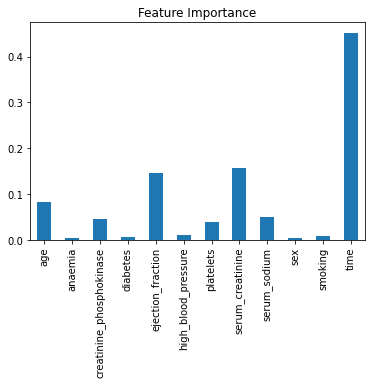

In [31]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", 
                     legend = False);

# Saving the models that scored well 

In [ ]:
import pickle
# Exporting the Random Forest Model
filename = 'rf_Classifier_model.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))



## Experimantation 
Now that I got my base model built and its recall is not as high as I would like it to be, lets make some feature engineering and see where we can make some changes to the dataset. Things to consider are:
* Outliers 
* Whether or not some columns can be merged depending on corralation between data
* Adding some more columns by splitting some data into categories


In [29]:
import pickle
with open("rf_Classifier_model.sav", 'rb') as file:  
    XGBooster_Model = pickle.load(file)

D:\Development\Anaconda\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
D:\Development\Anaconda\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
df_tmp.hist()

### Lets have a closer look at the distribution of data in the age column 

In [ ]:
df_tmp.age.hist(bins = 40)

We can see that the distribution of age got some outliers which are the values between 70 and 80+ but lets only get rid off the data that is above 80 and see how the model scores in terms of recall and then maybe delete anything above 70

In [ ]:
df_tmp.drop(df_tmp[df_tmp.age > 85].index, inplace = True)

In [ ]:
df_tmp.age.hist()

#### Lets make aother hyperparameter tuning using GridSearchCV on the RandomForestModel first just after deleting outliers for age column and see how it scores in terms of recall

In [ ]:
X = df_tmp.drop(columns = "DEATH_EVENT")
y = df_tmp["DEATH_EVENT"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
rf_grid_search = {'max_depth': [5,10,15],
 'min_samples_leaf': np.arange(2,10,2),
 'min_samples_split': np.arange(2,20,2),
 'n_estimators': [60,80,100]}
rf_model_ = RandomForestClassifier()

gs_rf_model = GridSearchCV(rf_model_,
                    param_grid = rf_grid_search,
                    cv = 5,
                    verbose = True,
                    scoring= "recall"
                    )
gs_rf_model.fit(X_train,y_train)

In [ ]:
# Lets see the best parameters for Random Forest Classifier model
gs_rf_model.best_params_

In [ ]:
rf_model_y_preds = gs_rf_model.predict(X_test)
recall_score(y_test,rf_model_y_preds)
rf_Classifier = RandomForestClassifier( max_depth = 10,
                                        min_samples_leaf = 6,
                                        min_samples_split = 4,
                                        n_estimators = 60)
rf_Classifier.fit(X_train,y_train)

In [ ]:
# Built the dataframe where the models' scores will be saved for fututre visualization of scores
np.random.seed(42)
def preds_and_scores(models,X_train, y_tran,X_test,y_test):
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_recall = {}
        model_recall[name] = recall_score(y_test, model.predict(X_test))
    return model_recall
models_ = {"Random Forest Classifier": RandomForestClassifier(max_depth = 10,
                                                              min_samples_leaf = 6,
                                                              min_samples_split = 4,
                                                              n_estimators = 60)}
df_recall_scores = pd.DataFrame(preds_and_scores(models_, X_train, y_train, X_test, y_test), index=["Recall"])
df_recall_scores


## Hyperparameter tunining using GridSearchCV on XGBooster Classifier

In [ ]:
# Lets re-build the XGBooster and do hyperparameter tuning on the 'new' dataset

# Initialize the XGBooster 
XGBooster_model = XGBClassifier()
# Set hyperparameters for GridSearchCV
XGBooster_params = {"eta": np.arange(0.2,1,0.2),
                   "gamma": np.arange(2,10,2),
                   "max_depth": np.arange(2,10,2),
                   "min_child_weight": np.arange(1,3,1),
                   "max_delta_step": np.arange(0,3,1),
                   "subsample": [0.5,1]}
# Setting random seed
np.random.seed(42)
XGBooster_model_gs = GridSearchCV(XGBooster_model,
                                 XGBooster_params,
                                 cv = 5,
                                 verbose = True,
                                 scoring = "recall")

# Fitting the Grid Search CV  XGBoosterClassifier model with the data
XGBooster_model_gs.fit(X_train,y_train)


In [ ]:
# Checking best parameters for XGBooster after GridSearchCV
XGBooster_model_gs.best_params_

In [ ]:
def plot_conf_mat(y_test,y_preds):
    """
    Plot nice looking onfusion matrix using Seaborn's heatmap
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


In [ ]:
# Visulizing Random Forest Clssifier predictions with confusion matrix
y_preds_model = rf_Classifier.predict(X_test)
plot_conf_mat(y_test, y_preds_model)

In [ ]:
# Initilizing XGBooster Classifier with the best params(based on GridSearchCV)
XGbooster_bp = XGBClassifier( eta = 0.6000000000000001,
                                   gamma = 6,
                                   max_delta_step = 1,
                                   max_depth = 4,
                                   min_child_weight = 2,
                                   subsample = 0.5)
# Fitting the model
XGbooster_bp.fit(X_train, y_train)
# Predicting the value with XGbooster
y_preds_XGBooster = XGbooster_bp.predict(X_test)


In [ ]:
# Checking the recall Score  
recall_score(y_test, y_preds_XGBooster)

In [ ]:
# Visulizng the predictions using confusion matrix 
plot_conf_mat(y_test, y_preds_XGBooster)

## Deleting Outliers for the rest of the data

In [ ]:
df_tmp.hist();

In [ ]:
# Paletelets distrubution 
df_tmp.platelets.hist(bins =30)

In [ ]:
# Deleting outliers for paletelets column
df_tmp.drop(df_tmp[df_tmp.platelets > 600000].index, inplace = True)
df_tmp.platelets.hist()

In [ ]:
df_tmp.head()

In [ ]:
# Checking distribution for creatinine phosphokinase
df_tmp["creatinine_phosphokinase"].hist(bins=30)

Even thouh we can see some outliers for creatinine phosphokinase I wouldn't delete those data as those outliers could corralate to death - This would require much deeper data analysis but based on the size of data I would not be able to make the right asssumption without the help of the medical expert. However in this sample we can see that there is only about 5 patients that have higher values that 3000 so I will delete those patients

In [ ]:
df_tmp.head()

In [ ]:
# Deleting the outliers
df_tmp.drop(df_tmp[df_tmp["creatinine_phosphokinase"] > 3000].index, inplace = True)
df_tmp["creatinine_phosphokinase"].hist(bins=30);


In [ ]:
# Checking the distrubution for serum sodium
df_tmp.serum_sodium.hist(bins=30)

In [ ]:
# Deleting the outliers for serum sodium
df_tmp.drop(df_tmp[df_tmp.serum_sodium < 125].index, inplace = True)
df_tmp.serum_sodium.hist(bins=20)

In [ ]:
df_tmp.hist()

## After the data Cleaning, Checking how both models : XGBooster and Random Forest after re-applying the hyperparameter tuning using GridSearchCV 

In [ ]:
# Splitting the data on the new data set
X = df_tmp.drop("DEATH_EVENT", axis = 1)
y = df_tmp["DEATH_EVENT"]
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Initialize the XGBooster 
XGBooster_model_2 = XGBClassifier()
# Set hyperparameters for GridSearchCV
XGBooster_params = {"eta": np.arange(0.2,1,0.2),
                   "gamma": np.arange(2,10,2),
                   "max_depth": np.arange(2,10,2),
                   "min_child_weight": np.arange(1,3,1),
                   "max_delta_step": np.arange(0,3,1),
                   "subsample": [0.5,1]}
# Setting random seed
np.random.seed(42)
XGBooster_model_gs_2 = GridSearchCV(XGBooster_model_2,
                                 XGBooster_params,
                                 cv = 5,
                                 verbose = True,
                                 scoring = "recall")

# Fitting the Grid Search CV  XGBoosterClassifier model with the data
XGBooster_model_gs_2.fit(X_train,y_train)

In [ ]:
# Checking the best hyperparameters for XGBClassifier after GridSearchCV 
XGBooster_model_gs_2.best_params_

In [ ]:

rf_grid_search = {'max_depth': [5,10,15],
                  'min_samples_leaf': np.arange(2,10,2),
                  'min_samples_split': np.arange(2,20,2),
                  'n_estimators': [60,80,100]}
rf_model_2 = RandomForestClassifier()

gs_rf_model_2 = GridSearchCV(rf_model_2,
                    param_grid = rf_grid_search,
                    cv = 5,
                    verbose = True,
                    scoring= "recall"
                    )
gs_rf_model_2.fit(X_train,y_train)

In [ ]:
# Checking the best hyperparameters for Random Forest Classifier after applying GridSearchCV
gs_rf_model_2.best_params_

In [ ]:
# Initilizing eah model with the best hyperparameters

rf_model_2 = RandomForestClassifier(max_depth = 10,
                                    min_samples_leaf = 4,
                                    min_samples_split = 4,
                                    n_estimators = 80)
XGBooster_model_2 = XGBClassifier(eta = 0.4,
                                  gamma = 2,
                                  max_delta_step = 1,
                                  max_depth = 2,
                                  min_child_weight = 1,
                                  subsample = 0.5)

recall_df = pd.DataFrame()
# Fitting the data to re-build models using best parameters
rf_model_2.fit(X_train,y_train)
XGBooster_model_2.fit(X_train,y_train)

# Cross validation for second XGbooster model
cross_val_score_XGBooster = cross_val_score(XGBooster_model_2,
                                           X,
                                           y,
                                           cv = 5,
                                           scoring = "recall")
# Cross validation for Random Forest Classification model no 2 
cross_val_score_rf_model = cross_val_score(rf_model_2,
                                          X,
                                          y,
                                          cv = 5,
                                          scoring = "recall")
# Taking the mean of model's each cross validation score
cv_xgbooster_recall_mean = cross_val_score_XGBooster.mean()
cv_rf_recall_mean = cross_val_score_rf_model.mean()

### Bulding the Data Frame for each model's scores (before and after full data cleaning)


In [ ]:
# Initilizing the Dictionary that contains all the recall scores for each model
df_dict = {"Random Forest M0": 0.433684,
           "XGBooster M0": 0.433684,
           "Random Forest M1": 0.65,
           "XGBooster M1": 0.55,
           "Random Forest M2": cv_rf_recall_mean,
           "XGBoooster M2": cv_xgbooster_recall_mean}
recall_df = pd.DataFrame(df_dict, index = ["Recall"])
recall_df.T.plot.bar()

In [ ]:
cv_rf_recall_mean

After looking at the graph we can come to the conclusion that the base model before any data cleaning was the worst(both models scored the same), however just after taking the outliers for Age column the Random Forest Classification model scored the best achiving 0.65. Offcourse the only issue here is that this model's recall score wasn't based after applying cross validation but when we compare it to 0.5375 recall mean score it is still about 12 percantage points higher than the RandomForest Classifcation model after making futher data cleaning. 

So now I am gonna re-initilize the dataset frame to the initial DataFrame and then just repeat the first step in Data Cleaning (Delete Age outliers), then do hyperparameter tuning with wider range of hyperparameters, and at the end measure the recall and compare the results with current scores to see. 

## Deleteting Age Outliers and Hyperparametertuning for Random Forest Classifier and XGBooster


In [ ]:
df_tmp_2 = df.copy()

In [ ]:
# Droping the Age column where Age is higher than 85
df_tmp_2.drop(df_tmp_2[df_tmp_2.age > 85].index, inplace = True)

In [ ]:
# Building the Dictionary for hyperparameter tuning - Random Forest Classifier

rf_gs_model_3_grid = {'max_depth': [5,10,15],
                      'min_samples_leaf': np.arange(2,10,2),
                      'min_samples_split': np.arange(2,20,2),
                      'max_features': ['auto', 'log2'],
                      'max_leaf_nodes':[None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                      'bootstrap': [True,False],
                      'n_estimators': [60,80,100]}
# Setting random seed 
np.random.seed(42)
# Initilizing GridSeachCV on Random Forest Classifier
rf_gs_model_3 = GridSearchCV(RandomForestClassifier(),
                             rf_gs_model_3_grid,
                             cv = 5,
                             verbose = True
                            )
# Building the dictionary for XGBooster
xgbooster_gs_model_3_grid = {"eta": np.arange(0.2,1,0.2),
                             "gamma": np.arange(2,10,2),
                             "max_depth": np.arange(2,10,2),
                             "min_child_weight": np.arange(1,3,1),
                             "max_delta_step": np.arange(0,3,1),
                             "subsample": [0.5,1]}
# Initilizing GridSearchCV on XGBooster Classifier
xgbooster_gs_model_3 = GridSearchCV(XGBClassifier(),
                                    xgbooster_gs_model_3_grid,
                                    cv = 5,
                                    verbose = True)
# Splittng the data into training and testing set 
X = df_tmp_2.drop("DEATH_EVENT", axis = 1)
y = df_tmp_2["DEATH_EVENT"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fitting the data into Random Forest Classifier GridSearchCV model
rf_gs_model_3.fit(X_train,y_train)

# Fitting the data into XGBooster
xgbooster_gs_model_3.fit(X_train,y_train)

In [ ]:
# Checking best parameters for RandomForestClassifier after GridSearchCV 
rf_gs_model_3.best_params_

In [ ]:
# Checking the best parameters for XGBoosterClassifier after GridSearchCV
xgbooster_gs_model_3.best_params_

In [ ]:
# Initilizing the Random Forest Classifier with the best parameters 
rf_model_3 = RandomForestClassifier(bootstrap = True,
                                    max_depth = 5,
                                    max_features = 'auto',
                                    max_leaf_nodes = 8,
                                    min_samples_leaf = 2,
                                    min_samples_split = 6,
                                    n_estimators = 60)

# Initilizing XGBooster Classifier with the best parameters 
xgbooster_model_3 = XGBClassifier(eta = 0.4,
                                          gamma = 6,
                                          max_delta_step = 1,
                                          max_depth = 4,
                                          min_child_weight = 1,
                                          subsample = 0.5)

# Fitting the dataset to both models
rf_model_3.fit(X_train, y_train)
xgbooster_model_3.fit(X_train,y_train)
# Making predictions using the third model of Random Forest Calssifier and XGBooster Classifier
y_preds_rf_model_3 = rf_model_3.predict(X_test)
y_preds_xgbooster_model_3 = xgbooster_model_3.predict(X_test)



In [ ]:
# Visulizing the predictions for third model of Random Forest Classifier using confusion matrix 
plot_conf_mat(y_test, y_preds_rf_model_3)

In [ ]:
# Visulizing predictions for third model of XGBooster Classifier 
plot_conf_mat(y_test, y_preds_xgbooster_model_3)

### Measuring the recall for XGBooster and Random Forest Classifier using cross validation

In [ ]:
# Setting random seed 
np.random.seed(42)
# Cross validation for second XGbooster model no 3
cross_val_score_XGBooster_3 = cross_val_score(xgbooster_model_3,
                                           X,
                                           y,
                                           cv = 5,
                                           scoring = "recall")
# Cross validation for Random Forest Classification model no 3 
cross_val_score_rf_model_3 = cross_val_score(rf_model_3,
                                          X,
                                          y,
                                          cv = 5,
                                          scoring = "recall")
# Recall mean for both models
cv_mean_rf_m3 = cross_val_score_rf_model_3.mean()
cv_mean_xgbooster_m3 = cross_val_score_XGBooster_3.mean()

# Initilizing the Dictionary that contains all the recall scores for each model
df_dict = {"Random Forest M0": 0.433684,
           "XGBooster M0": 0.433684,
           "Random Forest M1": 0.65,
           "XGBooster M1": 0.55,
           "Random Forest M2": cv_rf_recall_mean,
           "XGBoooster M2": cv_xgbooster_recall_mean,
           "Random Forest M3": cv_mean_rf_m3,
           "XGBooster M3": cv_mean_xgbooster_m3}
recall_df = pd.DataFrame(df_dict, index = ["Recall"])
recall_df.T.plot.bar(grid=True, ylim = (0, 0.7));


In [ ]:
# Lets see the AUC for XGBooster after hyperparameter tuning
plot_roc_curve(xgbooster_model_3, X_test, y_test);

In [ ]:
# Lets see the AUC for Random Forest Classifer after hyperparameter tuning
plot_roc_curve(rf_model_3, X_test, y_test);

In [ ]:
df_tmp.drop("sex", inplace = True)

We can assume that the experimantation process is done, what we learned is that the second mdoel of Random Forest Classifier(after dropping some data for age distrubition outliers) scored the best in recall, however the recall score for this model is little unfair due to the lack of validation and taking mean recall score from its validation score. Another thing to notice is how the little of data cleaning can change the performance of the model, both models achieved around at least 8 percamtage points better results than the base models in most cases. 

From AUC plot we can conclude that the Random Forest Classifier is better for this dataset achieving higher score and also getting to its best score much quicker

## THE END